## Import Libraries

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  # data visualisation 
import seaborn as sns # data visualisation 
import pickle # save/load model 

from sklearn.model_selection import train_test_split # Splitting data into train and test set 
from sklearn.tree import DecisionTreeClassifier, plot_tree  # decision tree classifier & plot decision tree 

from sklearn.metrics import confusion_matrix, precision_score,recall_score # evaluation of model 

## Dataset

In [2]:
df = pd.read_csv("/Applications/MAMP/htdocs/heart_disease_prediction/Model/Dataset/heart.csv") # read csv file 

In [3]:
df.head() # view df 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape # no. of rows, no. of columns

(303, 14)

In [5]:
df.isna().sum() # check for missing values 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory Data Analysis (EDA)

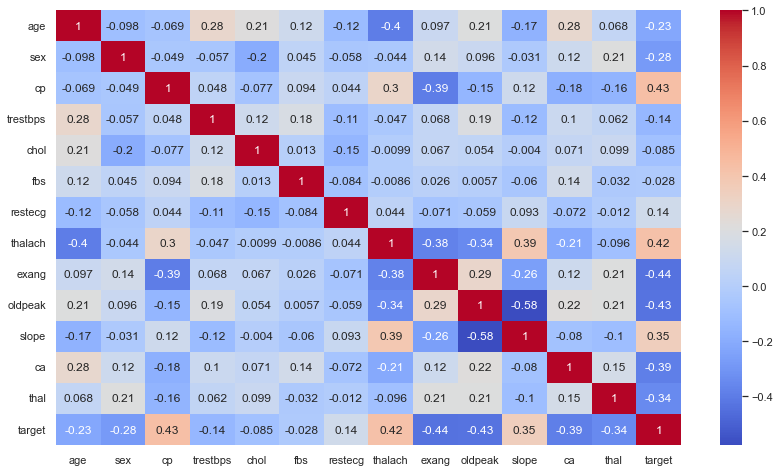

In [6]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, cmap="coolwarm", annot=True)

In [7]:
heart_disease = ['yes' if i == 1 else 'no' for i in df['target']]
df['Heart Disease'] = np.array(heart_disease)

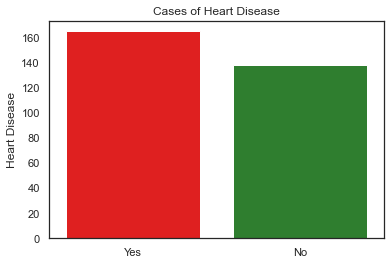

In [8]:
sns.barplot(x=['Yes', 'No'], y=df['Heart Disease'].value_counts(),palette=sns.color_palette(["red","forestgreen"]));
plt.title('Cases of Heart Disease');
plt.show()

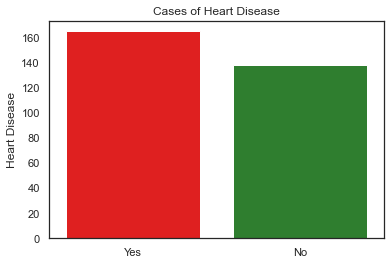

In [9]:
sns.barplot(x=['Yes', 'No'], y=df['Heart Disease'].value_counts(),palette=sns.color_palette(["red","forestgreen"]));
plt.title('Cases of Heart Disease');
plt.show()

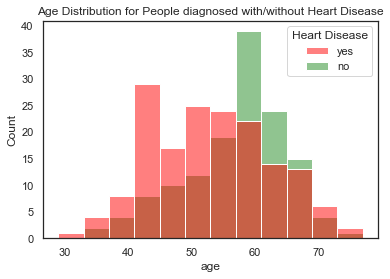

In [10]:

sns.histplot(data=df, x='age', hue='Heart Disease', palette=sns.color_palette(["red","forestgreen"]));
plt.title('Age Distribution for People diagnosed with/without Heart Disease');
plt.show()

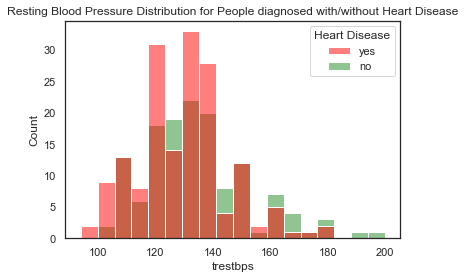

In [11]:
sns.histplot(data=df, x='trestbps', hue='Heart Disease',palette=sns.color_palette(["red","forestgreen"]));
plt.title('Resting Blood Pressure Distribution for People diagnosed with/without Heart Disease');

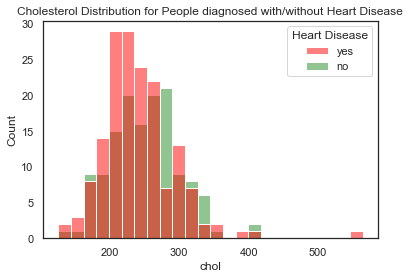

In [12]:
sns.histplot(data=df, x='chol', hue='Heart Disease',palette=sns.color_palette(["red","forestgreen"]));
plt.title('Cholesterol Distribution for People diagnosed with/without Heart Disease');

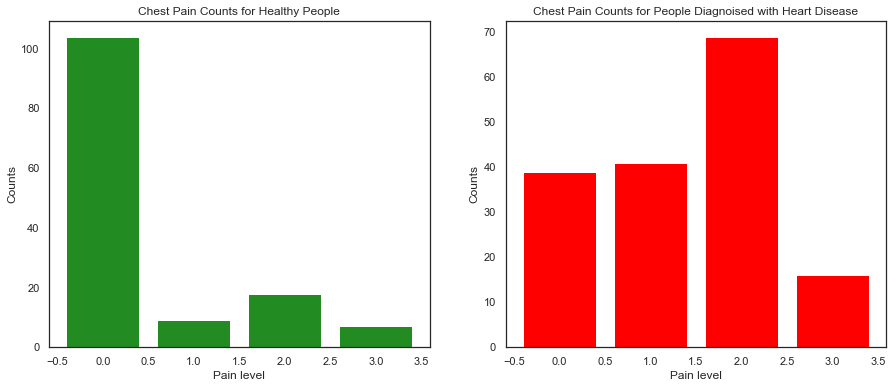

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.bar(df[df['target']==0].cp.value_counts().index, df[df['target']==0].cp.value_counts(), color="forestgreen");
ax1.set_xlabel('Pain level');
ax1.set_ylabel('Counts');
ax1.set_title('Chest Pain Counts for Healthy People');

ax2.bar(df[df['target']==1].cp.value_counts().index, df[df['target']==1].cp.value_counts(), color="red")
ax2.set_xlabel('Pain level');
ax2.set_ylabel('Counts');
ax2.set_title('Chest Pain Counts for People Diagnoised with Heart Disease');

## Decision Tree Classifier

#### 1. Splitting of Dataset

In [14]:
# features (attributes)
X = df.drop(['target', 'Heart Disease'], axis=1)

# target 
y = df['target']

In [15]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal']) # one hot encoding 
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,0,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=37) # split dataset 

#### 2. Training of Model

In [17]:
final_clf = DecisionTreeClassifier(random_state=37) 
final_clf.fit(x_train, y_train) # train the model 

DecisionTreeClassifier(random_state=37)

#### 3. Evaluation of Model (Train and test set)

In [18]:
final_clf.predict(x_train)
recall = recall_score(y_train, final_clf.predict(x_train),average='binary')
print('Recall: %.3f' % recall)

recall = precision_score(y_train, final_clf.predict(x_train), average='binary')
print('Precision: %.3f' % recall)

final_clf.score(x_train, y_train)

Recall: 1.000
Precision: 1.000


1.0

In [19]:
final_clf.predict(x_test)
recall = recall_score(y_test, final_clf.predict(x_test),average='binary')
print('Recall: %.3f' % recall)

recall = precision_score(y_test, final_clf.predict(x_test), average='binary')
print('Precision: %.3f' % recall)

final_clf.score(x_test, y_test)

Recall: 0.829
Precision: 0.850


0.8289473684210527

In [20]:
# check for overfitting - FUTURE WORK 

#### 4. Trial and Error (Find best max_depth)

In [21]:
acc_df = pd.DataFrame(columns = ["Max_depth", "Accuracy"])
index = 0 

# List of values to try for max_depth:
max_depth_range = list(range(1, 10))

# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
   clf = DecisionTreeClassifier(max_depth = depth, random_state = 37)
   clf.fit(x_test, y_test)
   score = clf.score(x_test, y_test)
   accuracy.append(score)
   acc_df.at[index, "Max_depth"] = depth 
   acc_df.at[index, "Accuracy"] = score 
   
   index += 1

In [22]:
acc_df

,Max_depth,Accuracy
0,1,0.802632
1,2,0.868421
2,3,0.921053
3,4,0.947368
4,5,0.973684
5,6,1.0
6,7,1.0
7,8,1.0
8,9,1.0


<AxesSubplot:xlabel='Max_depth', ylabel='Accuracy'>

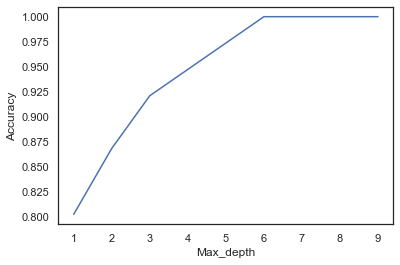

In [23]:
sns.lineplot(data=acc_df, y=acc_df["Accuracy"], x= acc_df["Max_depth"])

In [24]:
clf = DecisionTreeClassifier(random_state=37, max_depth = 4)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=37)

In [25]:
clf = DecisionTreeClassifier(random_state=37, max_depth = 6)
clf.fit(x_train, y_train)
print(clf.predict(x_test)) 
recall = recall_score(y_test, clf.predict(x_test),average='binary')
print('Recall: %.3f' % recall)

recall = precision_score(y_test, clf.predict(x_test), average='binary')
print('Precision: %.3f' % recall)

clf.score(x_test, y_test)

[1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0
 1 0]
Recall: 0.707
Precision: 0.829


0.7631578947368421

In [26]:
clf = DecisionTreeClassifier(random_state=37, max_depth = 7)
clf.fit(x_train, y_train)
print(clf.predict(x_test)) 
recall = recall_score(y_test, clf.predict(x_test),average='binary')
print('Recall: %.3f' % recall)

recall = precision_score(y_test, clf.predict(x_test), average='binary')
print('Precision: %.3f' % recall)

clf.score(x_test, y_test)

[0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1
 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0
 1 0]
Recall: 0.805
Precision: 0.846


0.8157894736842105

In [27]:
clf = DecisionTreeClassifier(random_state=37, max_depth = 8)
clf.fit(x_train, y_train)
print(clf.predict(x_test)) 
recall = recall_score(y_test, clf.predict(x_test),average='binary')
print('Recall: %.3f' % recall)

recall = precision_score(y_test, clf.predict(x_test), average='binary')
print('Precision: %.3f' % recall)

clf.score(x_test, y_test)

[1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0
 1 0]
Recall: 0.829
Precision: 0.850


0.8289473684210527

In [28]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(final_clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
2,cp,0.301
9,oldpeak,0.180
11,ca,0.138
0,age,0.109
7,thalach,0.061
3,trestbps,0.056
10,slope,0.055
12,thal,0.046
1,sex,0.022
8,exang,0.021


In [29]:
# saving model to current directory
# pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
pickle.dump(final_clf, open('model.pkl','wb'))